In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.callbacks import CSVLogger
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import os


2024-03-06 03:43:22.802268: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-06 03:43:23.056073: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 03:43:23.056136: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 03:43:23.070852: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 03:43:23.104385: I tensorflow/core/platform/cpu_feature_guar

In [10]:
train_dir = 'BACHAugmentStrain'
test_dir = 'BACHtestStrain'

# Define the image size and batch size
image_size = (224, 224)
batch_size = 32

random_seed = np.random.seed(1142)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split= 0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= image_size,
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'training',
    class_mode='categorical')

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size= image_size,
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'validation',
    class_mode='categorical')

test_datagen=ImageDataGenerator(rescale=1./255)
test_generator =test_datagen.flow_from_directory(test_dir,
                                                      target_size=image_size,
                                                          batch_size=batch_size,
                                                          seed=random_seed,
                                                          shuffle=False,
                                                          class_mode='categorical') # set as training data


Found 3208 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 103 images belonging to 4 classes.


In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's weights
base_model.trainable = True

# Add custom top layers for 4-class classification
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

optimizer = SGD(learning_rate=1e-3)
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

2024-03-06 03:44:23.403465: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-06 03:44:23.557572: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-06 03:44:23.557763: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
csv_logger = CSVLogger('training_results1.csv')
# Train the model
history = model.fit(train_generator, epochs=100, validation_data=val_generator, callbacks=[csv_logger])

/home/ntejha/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/home/ntejha/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/100


2024-03-06 03:45:43.285946: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-03-06 03:45:43.456114: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-06 03:45:45.820212: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-06 03:45:45.891327: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f78ed9336e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-06 03:45:45.891362: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
I0000 00:00:1709676945.934174   15829 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


101/101 [==============================] - 61s 379ms/step - loss: 1.3626 - accuracy: 0.3176 - val_loss: 1.2985 - val_accuracy: 0.4425
Epoch 2/100
101/101 [==============================] - 33s 322ms/step - loss: 1.2891 - accuracy: 0.4049 - val_loss: 1.3620 - val_accuracy: 0.2937
Epoch 3/100
101/101 [==============================] - 32s 317ms/step - loss: 1.2022 - accuracy: 0.4726 - val_loss: 1.0328 - val_accuracy: 0.6475
Epoch 4/100
101/101 [==============================] - 32s 314ms/step - loss: 1.0808 - accuracy: 0.5408 - val_loss: 1.1418 - val_accuracy: 0.4375
Epoch 5/100
101/101 [==============================] - 32s 311ms/step - loss: 1.0197 - accuracy: 0.5770 - val_loss: 1.2988 - val_accuracy: 0.3925
Epoch 6/100
101/101 [==============================] - 31s 308ms/step - loss: 0.9725 - accuracy: 0.6001 - val_loss: 1.0973 - val_accuracy: 0.4925
Epoch 7/100
101/101 [==============================] - 31s 310ms/step - loss: 0.8900 - accuracy: 0.6365 - val_loss: 0.7823 - val_accurac

In [14]:
import pickle

# Save model weights
model.save_weights('newBACH-VGG16.h5')

# Save training history
with open('newvgg_16training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [15]:
accuracy = model.evaluate(test_generator)[1]  # Index 1 corresponds to accuracy

print(f"Accuracy: {accuracy * 100:.2f}%")

4/4 [==============================] - 7s 2s/step - loss: 1.3815 - accuracy: 0.7767
Accuracy: 77.67%


In [16]:
from sklearn.metrics import confusion_matrix

# Generate predictions for the test data
predictions = model.predict(test_generator)

# Convert predictions into labels (assuming one-hot encoding)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test generator
true_labels = test_generator.classes

# Get the class labels from the test generator
class_labels = list(test_generator.class_indices.keys())

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

4/4 [==============================] - 6s 1s/step


In [17]:
class_labels

['Benign', 'InSitu', 'Invasive', 'Normal']

CONFUSION MATRIX


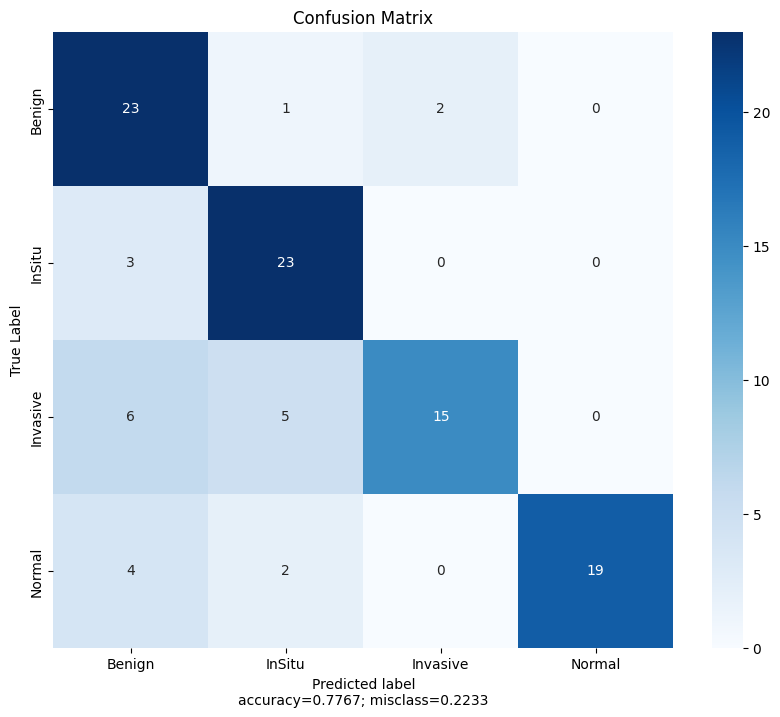

The details for confusion matrix is =
              precision    recall  f1-score   support

      Benign       0.64      0.88      0.74        26
      InSitu       0.74      0.88      0.81        26
    Invasive       0.88      0.58      0.70        26
      Normal       1.00      0.76      0.86        25

    accuracy                           0.78       103
   macro avg       0.82      0.78      0.78       103
weighted avg       0.81      0.78      0.78       103



In [19]:
print('CONFUSION MATRIX')
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Benign','InSitu','Invasive','Normal'],
                           index =['Benign','InSitu','Invasive','Normal'])

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.ylabel('True Label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.title('Confusion Matrix')
plt.savefig('newConfusionMatrix')
plt.show()
target_names=['Benign','InSitu','Invasive','Normal']
print('The details for confusion matrix is =')
print (classification_report(true_labels, predicted_labels,target_names=target_names))


4/4 [==============================] - 6s 1s/step


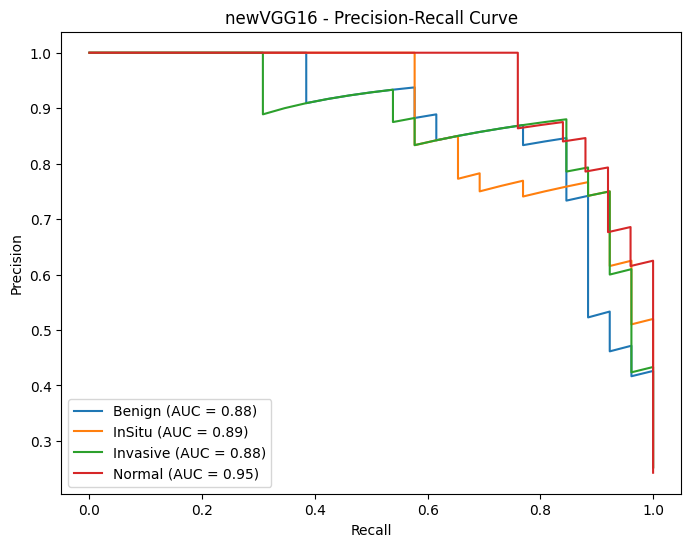

Benign: PR AUC = 0.88
InSitu: PR AUC = 0.89
Invasive: PR AUC = 0.88
Normal: PR AUC = 0.95


In [21]:
from sklearn.metrics import precision_recall_curve , auc
from tensorflow.keras.utils import to_categorical

def plot_precision_recall_curve(model, test_generator, class_labels):
    # Get true labels for the test data
    y_true = to_categorical(test_generator.labels)

    # Predict probabilities for each class using the model
    y_score = model.predict(test_generator)

    # Compute precision, recall, and thresholds for each class
    precision = dict()
    recall = dict()
    thresholds = dict()
    pr_auc = dict()

    for i, label in enumerate(class_labels):
        precision[label], recall[label], thresholds[label] = precision_recall_curve(
            y_true[:, i], y_score[:, i])
        pr_auc[label] = auc(recall[label], precision[label])

    # Plot precision-recall curve for each class
    plt.figure(figsize=(8, 6))

    for label in class_labels:
        plt.plot(recall[label], precision[label], label=f'{label} (AUC = {pr_auc[label]:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('newVGG16 - Precision-Recall Curve')
    plt.legend()
    plt.savefig('newVGG16 - Precision Recall Curve')
    plt.show()

    # Print precision-recall area for each class
    for label in class_labels:
        print(f'{label}: PR AUC = {pr_auc[label]:.2f}')

plot_precision_recall_curve(model , test_generator , class_labels)

4/4 [==============================] - 6s 1s/step


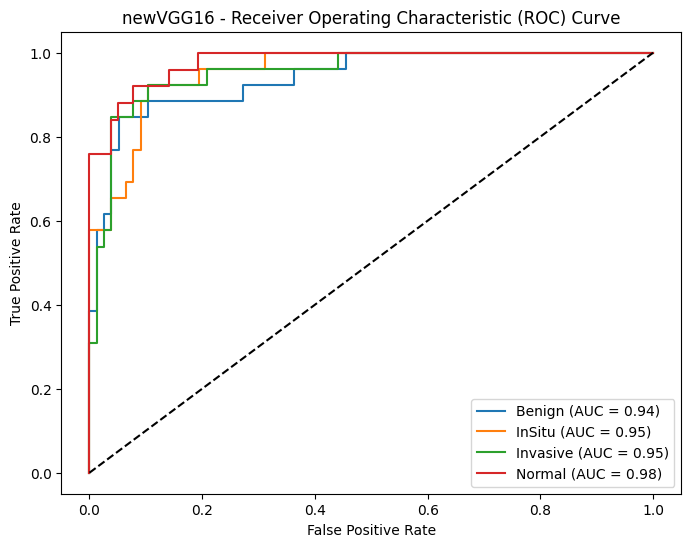

Benign: ROC AUC = 0.94
InSitu: ROC AUC = 0.95
Invasive: ROC AUC = 0.95
Normal: ROC AUC = 0.98


In [22]:
from sklearn.metrics import roc_curve
def plot_roc_curve(model, test_generator, class_labels):
    # Get true labels for the test data
    y_true = to_categorical(test_generator.labels)

    # Predict probabilities for each class using the model
    y_score = model.predict(test_generator)

    # Compute false positive rate, true positive rate, and thresholds for each class
    fpr = dict()
    tpr = dict()
    thresholds = dict()
    roc_auc = dict()

    for i, label in enumerate(class_labels):
        fpr[label], tpr[label], thresholds[label] = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc[label] = auc(fpr[label], tpr[label])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))

    for label in class_labels:
        plt.plot(fpr[label], tpr[label], label=f'{label} (AUC = {roc_auc[label]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('newVGG16 - Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig('newVGG16 - ROC')
    plt.show()

    # Print ROC AUC for each class
    for label in class_labels:
        print(f'{label}: ROC AUC = {roc_auc[label]:.2f}')
plot_roc_curve(model , test_generator , class_labels)

In [23]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(true_labels , predicted_labels)

print(f'Kappa Value : {kappa}')

Kappa Value : 0.7020125786163522


4/4 [==============================] - 6s 1s/step


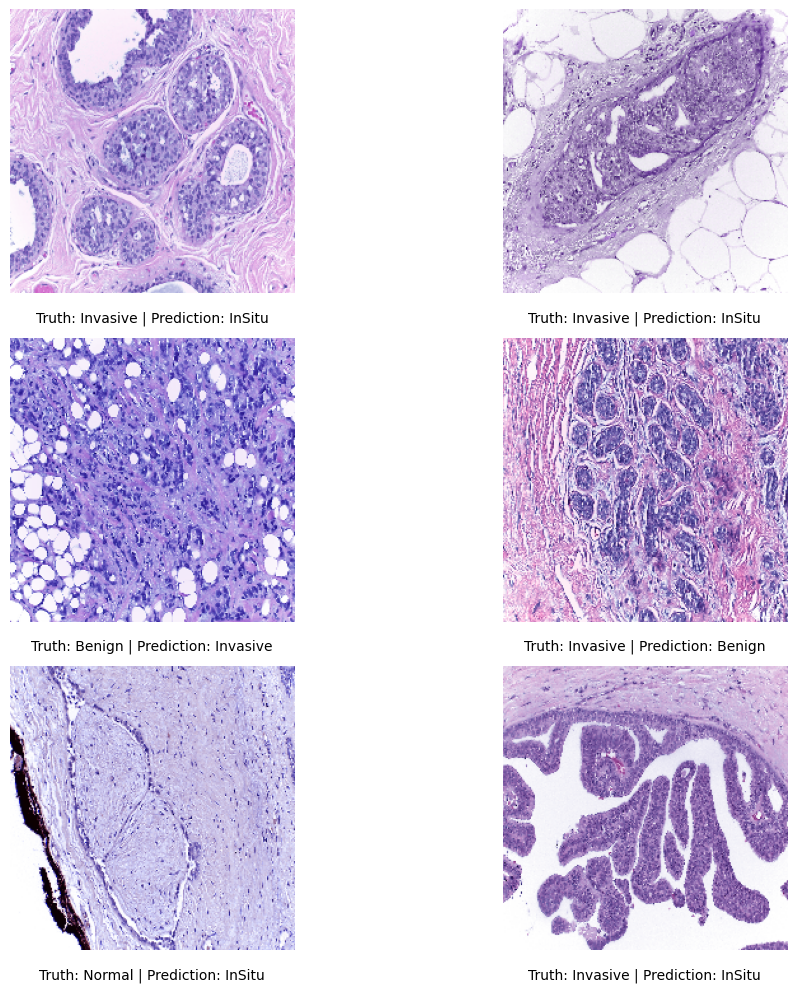

In [24]:
def plot_missclassified_imgs(model, test_generator, class_labels):
    # Get true labels for the test data
    y_true = test_generator.labels

    # Predict labels using the model
    y_pred = model.predict(test_generator).argmax(axis=1)

    # Find indices of misclassified images
    misclassified_indices = np.where(y_true != y_pred)[0]

    # Randomly select 6 misclassified images
    np.random.seed(42)
    selected_indices = np.random.choice(misclassified_indices, size=6, replace=False)

    # Set up the figure and axes
    fig, axes = plt.subplots(3, 2, figsize=(10, 10))
    fig.tight_layout()

    # Plot the misclassified images
    for i, idx in enumerate(selected_indices):
        # Retrieve the image and label at the given index
        x, _ = test_generator.next()
        image = x[i]
        label_true = class_labels[y_true[idx]]
        label_pred = class_labels[y_pred[idx]]

        ax = axes[i // 2, i % 2]
        ax.imshow(image)
        ax.axis('off')
        ax.text(0.5, -0.1, f'Truth: {label_true} | Prediction: {label_pred}', transform=ax.transAxes, ha='center')
        # ax.text(0.5, -0.2, f'', transform=ax.transAxes, ha='center')
    plt.savefig('newVGG16-MissclassifiedImages')
    plt.show()

plot_missclassified_imgs(model, test_generator, class_labels)

In [2]:
!pip install modAL

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

# Constants
TRAIN_DIR = 'BACHAugmentStrain'
TEST_DIR = 'BACHtestStrain'
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 8  # Reduced batch size
NUM_CLASSES = 4
INITIAL_LABELED_SAMPLES_PER_CLASS = 10
NUM_ACTIVE_LEARNING_ITERATIONS = 5

# Function to load data
def load_data(train_dir, test_dir):
    train_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical')
    
    return train_generator, test_generator

# Function to initialize VGG16 model
def initialize_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    for layer in base_model.layers:
        layer.trainable = False
    
    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Function to select samples for active learning
def select_samples_for_active_learning(train_generator, num_samples_per_class):
    selected_samples = []
    classes = os.listdir(TRAIN_DIR)
    for class_name in classes:
        class_dir = os.path.join(TRAIN_DIR, class_name)
        class_samples = os.listdir(class_dir)
        if len(class_samples) < num_samples_per_class:
            selected_samples.extend([(os.path.join(class_dir, sample), class_name) for sample in class_samples])
        else:
            selected_samples.extend([(os.path.join(class_dir, sample), class_name) for sample in random.sample(class_samples, num_samples_per_class)])
    return selected_samples


# Function to perform active learning iterations
def active_learning_loop(learner, train_generator, test_generator):
    for i in range(NUM_ACTIVE_LEARNING_ITERATIONS):
        print(f"Iteration {i+1}/{NUM_ACTIVE_LEARNING_ITERATIONS}")
        
        # Select samples for labeling
        labeled_samples = select_samples_for_active_learning(train_generator, INITIAL_LABELED_SAMPLES_PER_CLASS)
        
        # Add labeled samples to training dataset
        for sample_path, class_name in labeled_samples:
            os.rename(sample_path, os.path.join(TRAIN_DIR, class_name, os.path.basename(sample_path)))
        
        # Convert generator to arrays
        X_train, y_train = generator_to_array(train_generator, num_batches=INITIAL_LABELED_SAMPLES_PER_CLASS * NUM_CLASSES)
        
        # Retrain the model
        learner.teach(X_train, y_train)
        
        # Evaluate the model
        loss, accuracy = learner.score(test_generator)
        print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Function to convert generator to arrays
def generator_to_array(generator, num_batches):
    X = []
    y = []
    for i in range(num_batches):
        batch_x, batch_y = next(generator)
        X.append(batch_x)
        y.append(batch_y)
    return np.vstack(X), np.vstack(y)

# Load data
train_generator, test_generator = load_data(TRAIN_DIR, TEST_DIR)

# Initialize model
model = initialize_model()

# Initialize ActiveLearner
learner = ActiveLearner(
    estimator=model,
    query_strategy=uncertainty_sampling,
    X_training=None,
    y_training=None
)

def score(self, data_generator):
    test_images, test_labels = [], []
    for i in range(len(data_generator)):
        images, labels = next(data_generator)
        test_images.append(images)
        test_labels.append(labels)
    test_images = np.concatenate(test_images)
    test_labels = np.concatenate(test_labels)
    return self.estimator.evaluate(test_images, test_labels)

ActiveLearner.score = score

initial_labeled_samples = select_samples_for_active_learning(train_generator, INITIAL_LABELED_SAMPLES_PER_CLASS)
X_train_initial, y_train_initial = [], []
label_encoder = LabelEncoder()
for sample_path, class_name in initial_labeled_samples:
    image = tf.keras.preprocessing.image.load_img(sample_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.keras.applications.vgg16.preprocess_input(image)
    X_train_initial.append(image)
    y_train_initial.append(class_name)

y_train_initial = label_encoder.fit_transform(y_train_initial)

y_train_initial = to_categorical(y_train_initial, num_classes=NUM_CLASSES)

X_train_initial = np.array(X_train_initial)
learner.teach(X_train_initial, y_train_initial)

loss, accuracy = learner.score(test_generator)
print(f"Baseline Test Loss: {loss}, Baseline Test Accuracy: {accuracy}")

active_learning_loop(learner, train_generator, test_generator)


2024-03-24 15:15:13.362994: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-24 15:15:13.365336: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-24 15:15:13.409879: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-24 15:15:13.411080: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-24 15:15:14.275934: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Found 4008 images belonging to 4 classes.
Found 103 images belonging to 4 classes.


2024-03-24 15:15:25.131817: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-24 15:15:25.132215: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


4/4 [==============================] - 15s 3s/step - loss: 1.8329 - accuracy: 0.2524
Baseline Test Loss: 1.8329130411148071, Baseline Test Accuracy: 0.25242719054222107
Iteration 1/5
4/4 [==============================] - 8s 2s/step - loss: 1.3466 - accuracy: 0.5146
Test Loss: 1.346569299697876, Test Accuracy: 0.5145630836486816
Iteration 2/5
18/22 [=======================>......] - ETA: 9s - loss: 1.3262 - accuracy: 0.5017 

KeyboardInterrupt: 